In [1]:
# This notebook tests the effects of smoothing on our random models. 
# Tests have shown that we need something of a smooth model to get "nice" results
# (if the curve is too ragged, we need a lot of composition changes to accomodate the 
# rough changes in density).
#
# We decided to use an off the shelf implementation of  Savitzky-Golay filter, as this
# seems easy and appropriate.   Note that we calibrates the kernel size for 100 shells.
# A larger number of shells might need a larger kernel

In [2]:
# This cell sets the working directory so that the code will work on the cloud as well.

import os
cur_dir = os.getcwd()
if cur_dir.split('/')[-1] == "test":
    os.chdir('./..')

In [3]:
import numpy as np
import random
from matplotlib        import pyplot as plt
from matplotlib.pyplot import figure, legend

import lib.mc_density  as mc_density
import lib.constants   as constants
import lib.monotonic   as monotonic


In [4]:
# Set for Uranus
mass = constants.URANUS.mass
moment_ratio=constants.URANUS.moment_ratio
radius = constants.URANUS.radius
pct_rock, pct_water, pct_env = 0.6, 0.3, 0.1
num_shells = 100
rock_0 = 1.0  # This is the rock percent in the innermost shell.
env_0 = 1.0 # This is the env percent in the outmost shell.


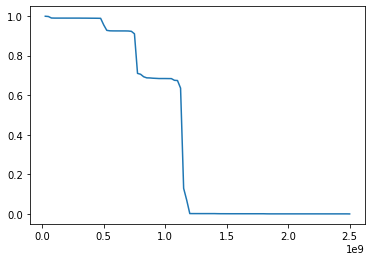

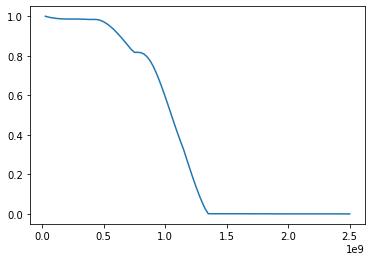

In [5]:
factory = mc_density.MCDensityFactory(mass, moment_ratio, radius, None, num_shells)
model = monotonic.get_monotonic_vals(factory._shells/factory._radius)

x,y = factory._shells, model
plt.plot(x,y)
figure()


# Run Savitzky-Golay filters of different sizes.
# Note: This code is used in monotonic.py.   
# You can change kernel size by setting "smooth".
# I have the polynomial order set to 3.  Using 5 seems too shap.

def smooth(data, kernel_size):
    from scipy.signal import savgol_filter
    new_data =  savgol_filter(data, kernel_size, 3) # polynomial order 3
    for i in reversed(range(len(new_data)-1)):
        new_data[i] = max(new_data[i], new_data[i+1])
    return new_data

plt.plot(x,smooth(y,31))

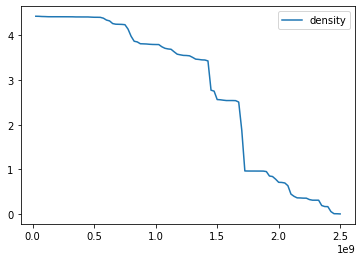

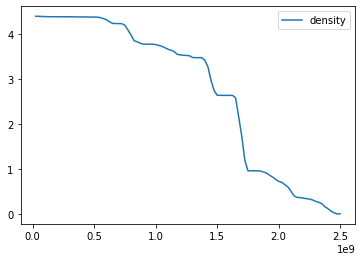

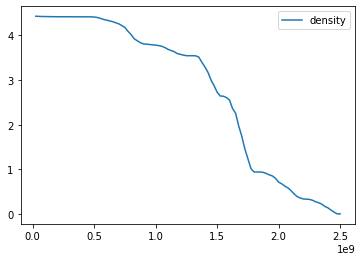

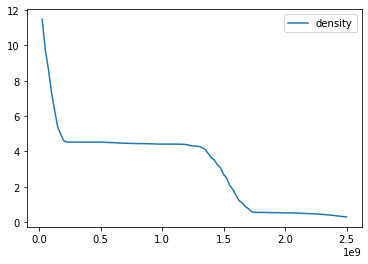

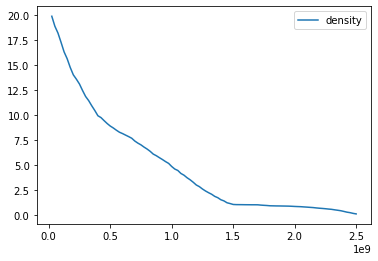

In [6]:
# This cell shows 


k=random.random()

random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=0.0)
mcdensity.plot_densities()
figure()
random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=51)
mcdensity.plot_densities()
figure()
random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=101)
mcdensity.plot_densities()
figure()
random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=201)
mcdensity.plot_densities()
figure()
random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=401)
mcdensity.plot_densities()
